# DATA ANALYSIS PROJECT
## TITANIC

This project is a part of our Python and Data Analysis basic training program.

Please download the titanic data set from the link below.

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv


Please complete the following tasks using this dataset;

- Find out basic features of the dataset
- Wrangler and clean your dataset
- Explore dataset
- Try to find patterns within your data
- Build your intuition and draw conclusions

**Data Dictionary from [Kaggle](https://www.kaggle.com/c/titanic/data)**

    Variable: Definition	Key
    survival: Survival	0 = No, 1 = Yes
    pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex: Sex	
    Age: Age in years	
    sibs: # of siblings / spouses aboard the Titanic	
    parch: # of parents / children aboard the Titanic	
    ticket: Ticket number	
    fare: Passenger fare	
    cabin: Cabin number	
    embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
    
**pclass:** A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\
**sibsp:** The dataset defines family relations in this way...\
**Sibling =** brother, sister, stepbrother, stepsister\
**Spouse =** husband, wife (mistresses and fiancés were ignored)\
**parch:** The dataset defines family relations in this way...\
**Parent =** mother, father\
**Child =** daughter, son, stepdaughter, stepson\
Some children travelled only with a nanny, therefore parch=0 for them.

In [403]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Render plots inline
%matplotlib inline

# Read in the dataset, create dataframe
titanic_data=pd.read_csv ('titanic_data.csv')

sns.set_style("dark")

In [404]:
# Print the first and last few records to review data and format
titanic_data.head(-1)

# Print the last few records to review data and format
# titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [405]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [406]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [407]:
women = titanic_data.loc[titanic_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)*100
sum_women = sum(titanic_data.loc[titanic_data.Sex == 'female']['Survived'])
man = titanic_data.loc[titanic_training.Sex == 'male']['Survived']
rate_man = sum(man)/len(man)*100

In [408]:
print("% of women who survived:{:.2f}%".format (rate_women,len(women),sum(women)))
print("% of man who survived:{:.2f}%".format(rate_man,len(man),sum(man)))

% of women who survived:74.20%
% of man who survived:18.89%


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

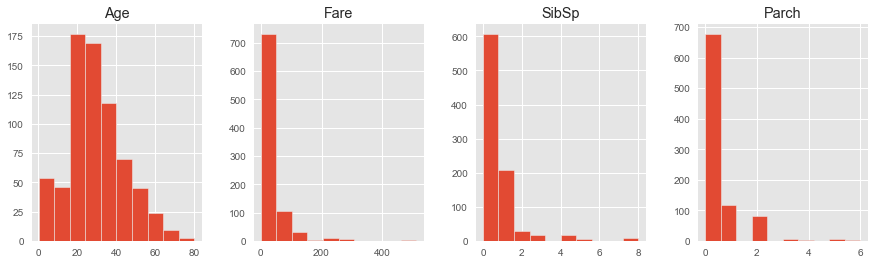

In [496]:
plt.style.use('ggplot')
titanic_data[['Age','Fare', 'SibSp', 'Parch']].hist(figsize=(15,4), layout=(1,4))

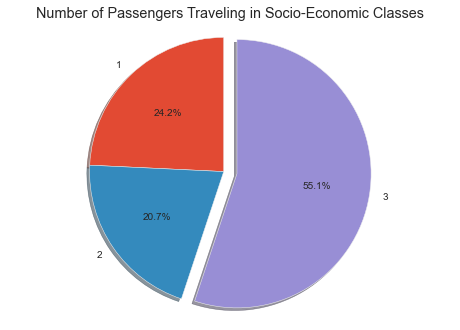

In [573]:
# Group data by Number of Passengers Traveling in Different Socio-Economic Classes (Pclass)
pclass = titanic_data.groupby("Pclass").size()
labels =(1,2,3)
# Bar plot of Number of Passengers Traveling in Different Socio-Economic Classes

fig1, ax1 = plt.subplots()
ax1.pie(pclass,labels=labels,explode=(0, 0, 0.1), autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.title("Number of Passengers Traveling in Socio-Economic Classes")
plt.show()

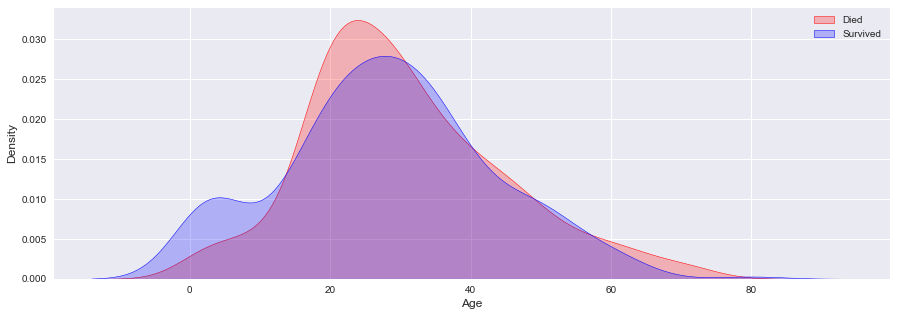

In [609]:
#fig,axs=plt.subplots(nrows=2)
fig,axs=plt.subplots(figsize=(15,5))
sns.set_style(style='darkgrid')
sns.kdeplot((titanic_data.loc[(titanic_data['Survived']==0),'Age']),color='r',shade=True,label='Not Survived')
sns.kdeplot((titanic_data.loc[(titanic_data['Survived']==1),'Age']),color='b',shade=True,label='Survived')
plt.legend(['Died', 'Survived'])


# Data Cleanup

In [410]:
#Step 1 - Duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print ('Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum()))

Number of duplicate entries is/are 0


In [411]:
#Step 2 - Remove unnecessary columns
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [412]:
#Step 3 - Fix missing or data format issues 

# Calculate number of missing values
titanic_data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [413]:
# Review some of the missing Age data
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [414]:
# Number of males and females with missing age values

missing_age_female = titanic_data_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['Sex'] == 'male'

print ('Number for females and males with age missing are {} and {} respectively, total {}'.format(
missing_age_female.sum(),missing_age_male.sum(),titanic_data_cleaned[missing_age_bool]['Sex'].count()))

Number for females and males with age missing are 53 and 124 respectively, total 177


In [415]:
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


Due to missing age data, this needs to be taken into account when examining descriptive statistics such as mean age.

Pay attention to the ratios between men and women...

Missing age in male data: 124
Missing age in female data: 53 

# Data Exploration and Visualization

In [556]:
titanic_data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [557]:
# Age min at 0.42 looks a bit weird so give a closer look
titanic_data_cleaned[titanic_data_cleaned['Age']<1]
titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

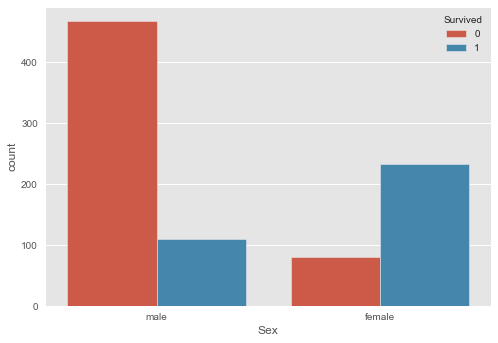

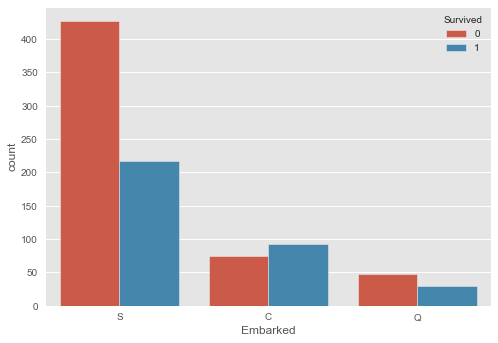

<AxesSubplot:xlabel='Pclass', ylabel='count'>

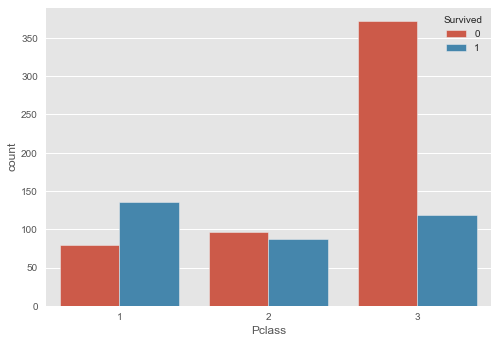

In [558]:
plt.style.use('ggplot')
sns.countplot(x=titanic_training['Sex'], hue=titanic_training['Survived'])
plt.show()
sns.countplot(x=titanic_training['Embarked'], hue=titanic_training['Survived'])
plt.show()
sns.countplot(x=titanic_training['Pclass'], hue=titanic_training['Survived'])

# Question 1

Were social-economic standing a factor in survival rate?

In [559]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(1)
    
    return survived_sex_pct

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.8%
Class 1 - male survival rate: 36.9%
-----
Class 2 - female survival rate: 92.1%
Class 2 - male survival rate: 15.7%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.5%


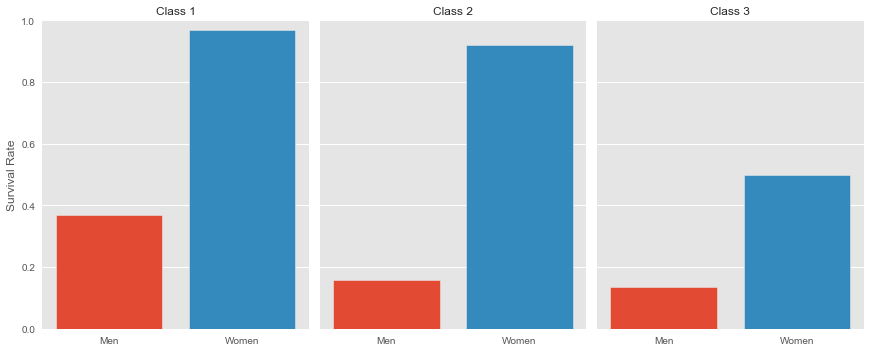

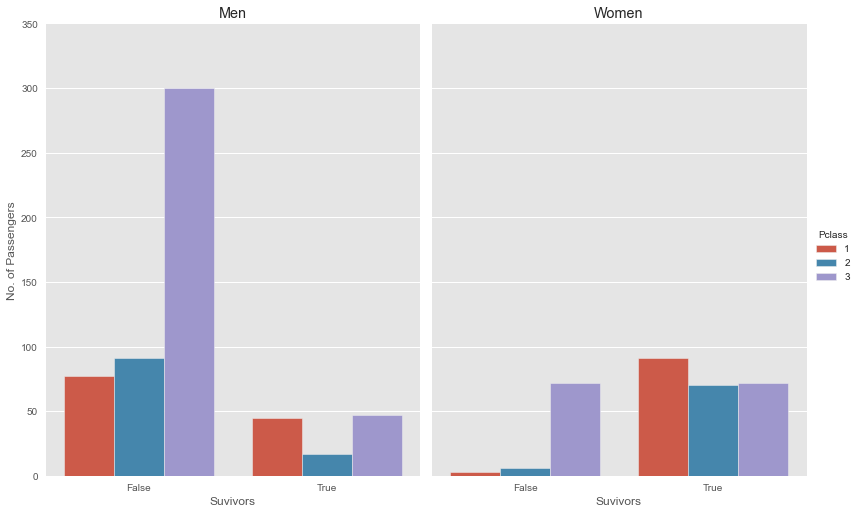

In [560]:
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Grouped by class, survival and sex
print (groupedby_class_survived_size)
print ('Class 1 - female survival rate: {}%'.format(survival_rate(1,'female')))
print ('Class 1 - male survival rate: {}%'.format(survival_rate(1,'male')))
print ('-----')
print ('Class 2 - female survival rate: {}%'.format(survival_rate(2,'female')))
print ('Class 2 - male survival rate: {}%'.format(survival_rate(2,'male')))
print ('-----')
print ('Class 3 - female survival rate: {}%'.format(survival_rate(3,'female')))
print ('Class 3 - male survival rate: {}%'.format(survival_rate(3,'male')))

# Graph - Grouped by class, survival and sex

g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_cleaned, 
                    saturation=1,kind="bar", ci=None, height=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))
plt.show()

# Graph - Actual count of passengers by survival, group and sex
g = sns.catplot(x='Survived', col='Sex', hue='Pclass', data=titanic_data_cleaned, kind='count', height=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set(ylim=(0, 350))
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the raw numbers it would appear as though passengers in Class 3 had a similar survival rate as those from Class 1 with 119 and 136 passengers surviving respectively. However, looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that a passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3.

# Question 2
Did age, regardless of sex and class, determine your chances of survival?

In [561]:
# Let us first identify and get rid of records with missing Age
print ('Number of men and woman with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum()))

# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts
titanic_data_age_cleaned = titanic_data_cleaned.dropna()

# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()
oldest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].max()

# Display a few raw totals
print ('Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_to_survive, oldest_to_die))

Number of men and woman with age missing are 53 and 124 respectively
Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


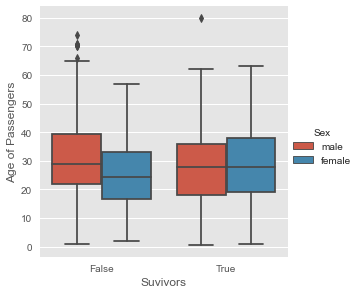

In [568]:
# Graph - Age of passengers across sex of those who survived
g = sns.catplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", height=4, aspect=1)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"]))

Based on the above boxplot and calculated data, it would appear that:

   -Regardless of sex and class, age was not a deciding factor in the passenger survival rate \
   -Average age for those who survived and even those who did not survive were inline with eachother

# Question 3

#What are the survival rates for children and adults by the age standard of 18 ? 


In [563]:
# Create Cateogry column and categorize people
titanic_data_age_cleaned.loc[
    ((titanic_data_age_cleaned['Sex'] == 'female') & (titanic_data_age_cleaned['Age'] >= 18)),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ((titanic_data_age_cleaned['Sex'] == 'male') & (titanic_data_age_cleaned['Age'] >= 18)),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'

# Get the totals grouped by Men, Women and Children, and by survival
print (titanic_data_age_cleaned.groupby(['Category','Survived']).size())


Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


C:\Users\rulker\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rulker\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rulker\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

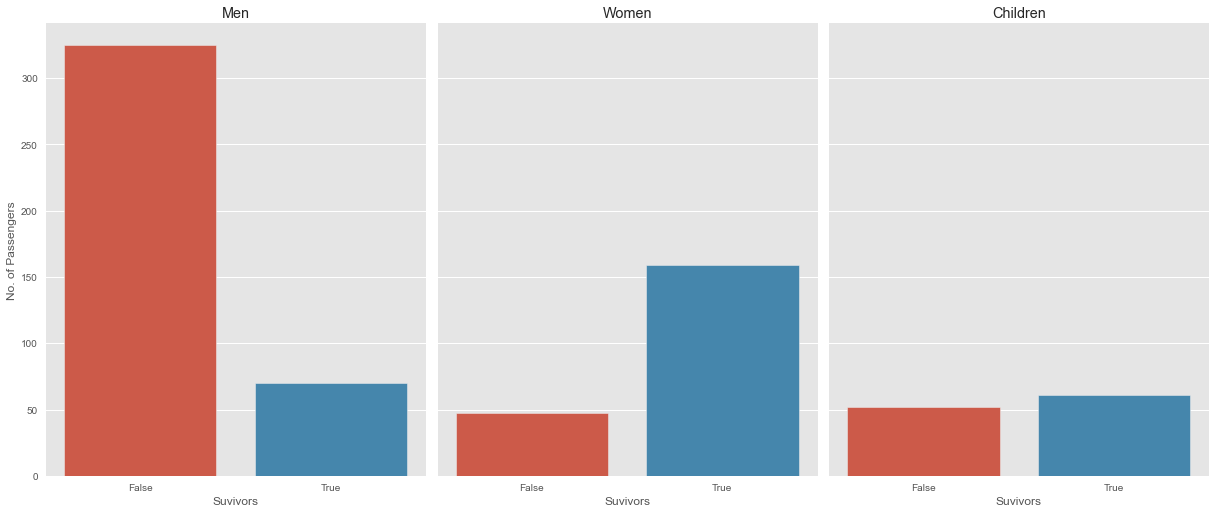

In [564]:
# Graph - Compare survival count between Men, Women and Children
g = sns.catplot(x='Survived', col='Category', data=titanic_data_age_cleaned, kind='count', height=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True']))

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

In [565]:
# Separate out children with parents from those with nannies 
titanic_data_children_nannies = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Child') &
    (titanic_data_age_cleaned['Parch'] == 0)]

titanic_data_children_parents = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Child') &
    (titanic_data_age_cleaned['Parch'] > 0)]

# Determine children with nannies who survived and who did not
survived_children_nannies = titanic_data_children_nannies.Survived.sum()
total_children_nannies = titanic_data_children_nannies.Survived.count()
pct_survived_nannies = ((float(survived_children_nannies)/total_children_nannies)*100)
pct_survived_nannies = np.round(pct_survived_nannies,2)
survived_children_nannies_avg_age = np.round(titanic_data_children_nannies.Age.mean())

# Display results
print ('Total number of children with nannies: {}\n\
Children with nannies who survived: {}\n\
Children with nannies who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_nannies, survived_children_nannies, 
        total_children_nannies-survived_children_nannies, pct_survived_nannies, survived_children_nannies_avg_age))

# Verify counts (looked a bit too evenly divided)

titanic_data_children_nannies.loc[titanic_data_children_nannies['Survived'] == 1]


Total number of children with nannies: 32
Children with nannies who survived: 16
Children with nannies who did not survive: 16
Percentage of children who survived: 50.0%
Average age of surviving children: 15.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Category
9,1,2,female,14.0,1,0,Child
22,1,3,female,15.0,0,0,Child
39,1,3,female,14.0,1,0,Child
84,1,2,female,17.0,0,0,Child
125,1,3,male,12.0,1,0,Child
156,1,3,female,16.0,0,0,Child
208,1,3,female,16.0,0,0,Child
220,1,3,male,16.0,0,0,Child
307,1,1,female,17.0,1,0,Child
389,1,2,female,17.0,0,0,Child


In [566]:
# Determine children with parents who survived and who did not
survived_children_parents = titanic_data_children_parents.Survived.sum()
total_children_parents = titanic_data_children_parents.Survived.count()
pct_survived_parents = ((float(survived_children_parents)/total_children_parents)*100)
pct_survived_parents = np.round(pct_survived_parents,2)
survived_children_parents_avg_age = np.round(titanic_data_children_parents.Age.mean())

# Display results
print ('Total number of children with parents: {}\n\
Children with parents who survived: {}\n\
Children with parents who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_parents, survived_children_parents, 
        total_children_parents-survived_children_parents, pct_survived_parents,survived_children_parents_avg_age))

Total number of children with parents: 81
Children with parents who survived: 45
Children with parents who did not survive: 36
Percentage of children who survived: 55.56%
Average age of surviving children: 7.0


Total number of children with parents: 81 \
Children with parents who survived: 45 \
Children with parents who did not survive: 36 \
Percentage of children who survived: 55.56% \
Average age of surviving children: 7.0